In [21]:
import pandas as pd
import mplfinance as mpf
import plotly.graph_objects as go

In [22]:
# Create a DataFrame with the provided data
data = pd.read_csv("NSEBANK.csv")
column_name = ["Symbol", "Date", "Time", "Open", "High", "Low", "Close", "Volume", "OpenInterest"]
data.columns = column_name

In [23]:
data.head()

,Symbol,Date,Time,Open,High,Low,Close,Volume,OpenInterest
0,.NSEBANK,2022/01/03,09:16,35666.7,35681.9,35655.8,35658.8,0,0
1,.NSEBANK,2022/01/03,09:17,35658.1,35658.1,35618.1,35640.9,0,0
2,.NSEBANK,2022/01/03,09:18,35637.0,35685.7,35637.0,35684.1,0,0
3,.NSEBANK,2022/01/03,09:19,35682.0,35698.6,35672.6,35691.9,0,0
4,.NSEBANK,2022/01/03,09:20,35689.1,35696.9,35651.3,35651.3,0,0


In [24]:
data["DateTime"] = pd.to_datetime(data["Date"] + " " + data["Time"])
data.set_index("DateTime", inplace=True)
data.head()

,Symbol,Date,Time,Open,High,Low,Close,Volume,OpenInterest
DateTime,,,,,,,,,
2022-01-03 09:16:00,.NSEBANK,2022/01/03,09:16,35666.7,35681.9,35655.8,35658.8,0,0
2022-01-03 09:17:00,.NSEBANK,2022/01/03,09:17,35658.1,35658.1,35618.1,35640.9,0,0
2022-01-03 09:18:00,.NSEBANK,2022/01/03,09:18,35637.0,35685.7,35637.0,35684.1,0,0
2022-01-03 09:19:00,.NSEBANK,2022/01/03,09:19,35682.0,35698.6,35672.6,35691.9,0,0
2022-01-03 09:20:00,.NSEBANK,2022/01/03,09:20,35689.1,35696.9,35651.3,35651.3,0,0


candlestick = go.Candlestick(x=data.index, open=data['Open'],high=data['High'],
                             low=data['Low'], close=data['Close'])
fig = go.Figure(data=[candlestick])
fig.show()

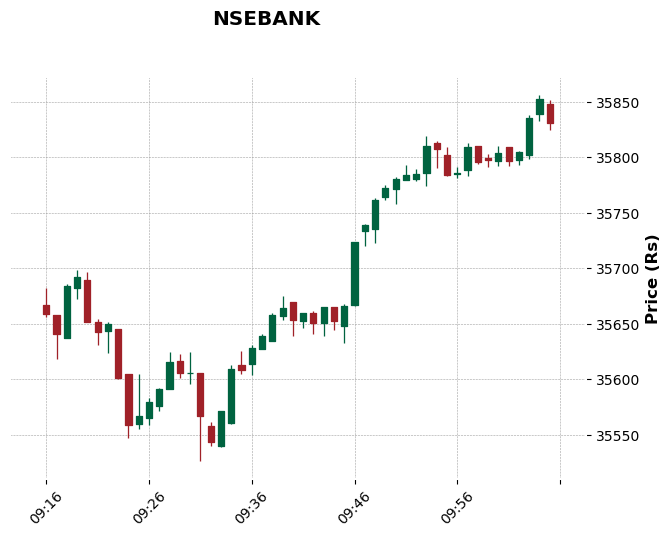

In [36]:
mpf.plot(data.iloc[:50,:], type='candle',style = 'charles',title='NSEBANK',ylabel='Price (Rs)')

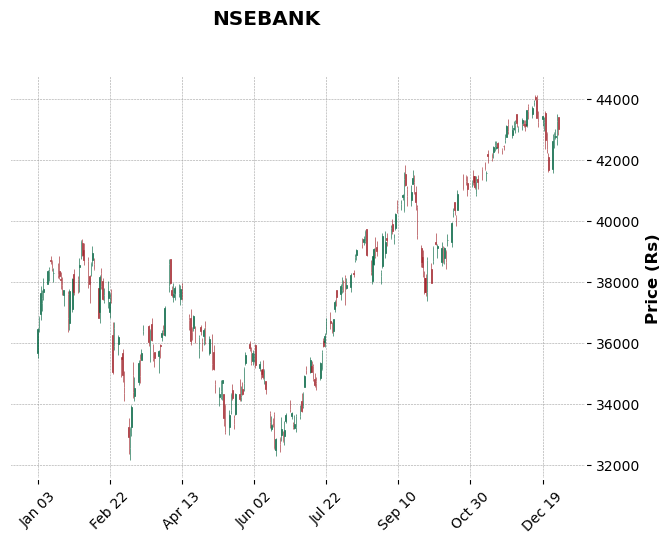

In [29]:
data_resampled = data.resample("D").agg({
    "Open": "first",
    "High": "max",
    "Low": "min",
    "Close": "last",
    "Volume": "sum",
    "OpenInterest": "last"
})
# Plot using line chart to avoid warning
mpf.plot(data_resampled, type='candle', style='charles', title='NSEBANK', ylabel='Price (Rs)')